In [1]:
#Cargamos las librerias a Usar 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import hvplot.pandas
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos
Data = pd.read_csv('./CarDetailsv3.csv')

In [3]:
# lectura de  Datos para el análisis exploratorio
Data.head(100)

,Nombre,Año,Precio_Venta,km_Recorrido,Combustible,Tipo_Vendedor,Transmision,Deuño,Kilometraje,Motor,Fuerza_Max,torque,asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hyundai i20 Asta Optional with Sunroof 1.2,2013.0,525000.0,61500.0,Petrol,Dealer,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
96,Maruti Swift Dzire LDI,2016.0,600000.0,150000.0,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
97,Hyundai Xcent 1.2 Kappa SX Option AT,2016.0,565000.0,72000.0,Petrol,Dealer,Automatic,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
98,Maruti Alto LX BSIII,2008.0,120000.0,68000.0,Petrol,Dealer,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [4]:
# Descripción de los datos
Data.describe()

,Año,Precio_Venta,km_Recorrido,asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         8128 non-null   object 
 1   Año            7787 non-null   float64
 2   Precio_Venta   7787 non-null   float64
 3   km_Recorrido   7787 non-null   float64
 4   Combustible    7787 non-null   object 
 5   Tipo_Vendedor  7787 non-null   object 
 6   Transmision    7787 non-null   object 
 7   Deuño          7787 non-null   object 
 8   Kilometraje    7566 non-null   object 
 9   Motor          7566 non-null   object 
 10  Fuerza_Max     7572 non-null   object 
 11  torque         7565 non-null   object 
 12  asientos       7566 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


Text(0.5, 1.0, 'Identificación de Datos Atípicos asientos')

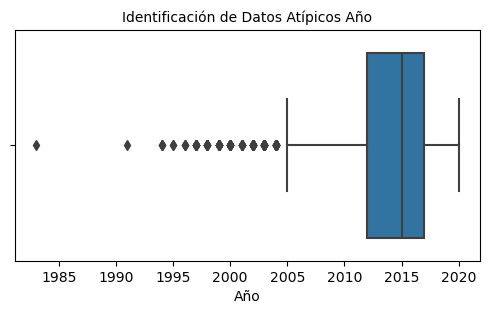

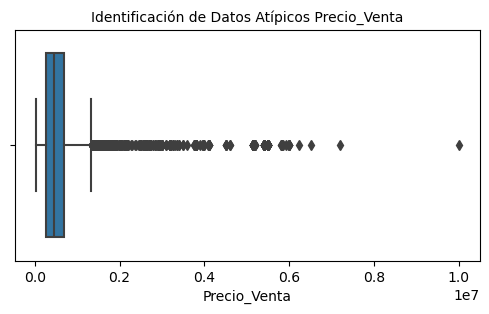

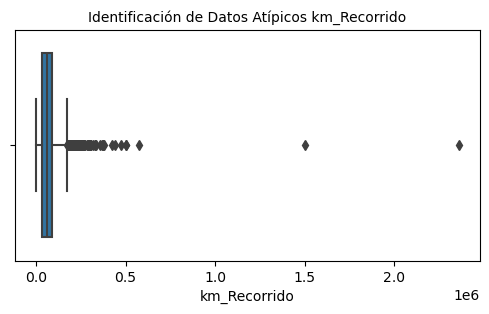

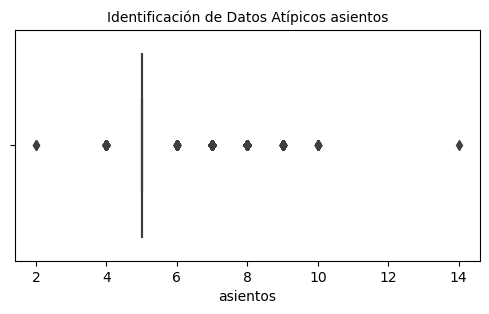

In [6]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Año'])
plt.title('Identificación de Datos Atípicos Año', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Precio_Venta'])
plt.title('Identificación de Datos Atípicos Precio_Venta', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['km_Recorrido'])
plt.title('Identificación de Datos Atípicos km_Recorrido', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['asientos'])
plt.title('Identificación de Datos Atípicos asientos', fontsize=10 )

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

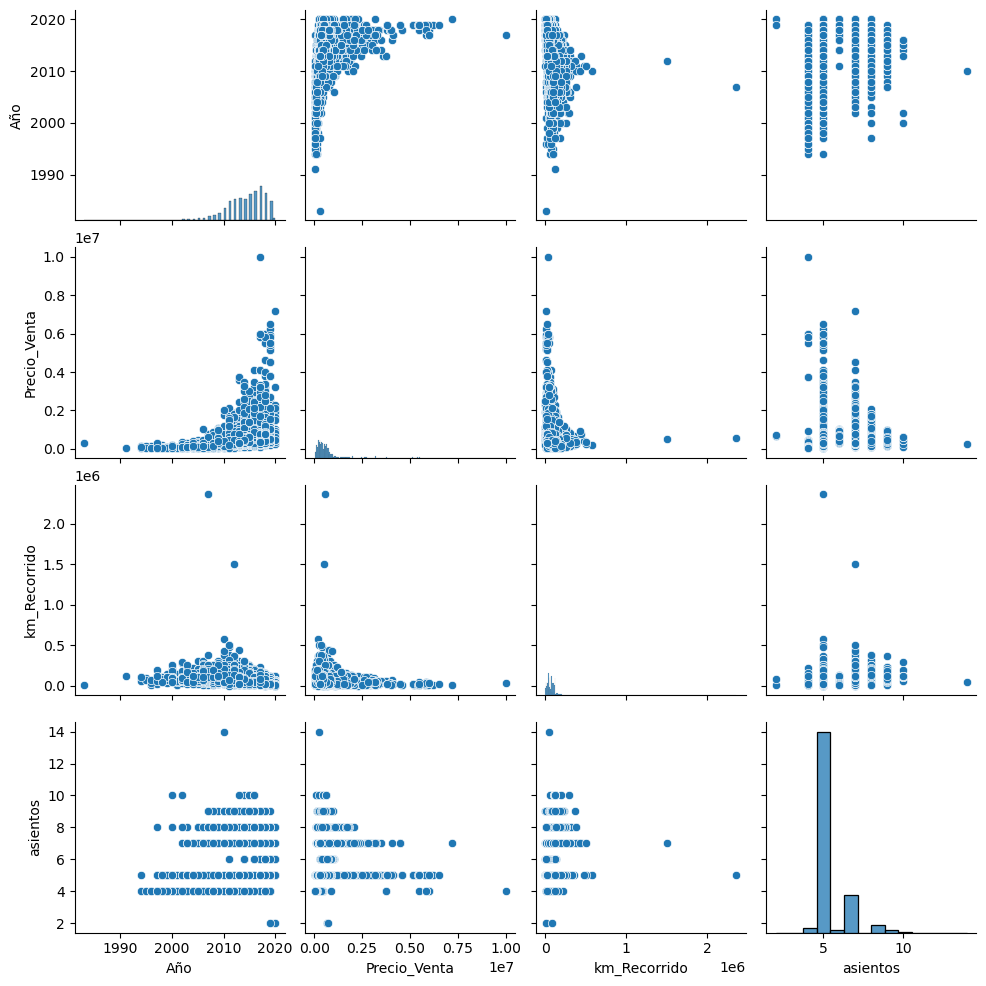

In [7]:
sns.pairplot(Data)
plt.show()

In [8]:
#Revisión de datos null
print("Cantidad de Registros nulos en Nivel de Año: ",Data['Año'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de Precio_Venta: ",Data['Precio_Venta'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de km_Recorrido: ",Data['km_Recorrido'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de asientos: ",Data['asientos'].isin([0]).sum())

Cantidad de Registros nulos en Nivel de Año:  0
Cantidad de Registros nulos en Nivel de Precio_Venta:  0
Cantidad de Registros nulos en Nivel de km_Recorrido:  0
Cantidad de Registros nulos en Nivel de asientos:  0


In [9]:
#Conteo de Datos Atípicos

MinAño=2000
MaxAño=2022
AtipicosAño=((Data['Año']<MinAño)|(Data['Año']>MaxAño)).sum()
print("El total de datos atípicos en la columna años es de {}".format(AtipicosAño))

MinPrecio=40000
MaxPrecio=7000000
AtipicosPrecio=((Data['Precio_Venta']<MinPrecio)|(Data['Precio_Venta']>MaxPrecio)).sum()
print("El total de datos atípicos en la columna precio es de {}".format(AtipicosPrecio))

MinKm=20000
MaxKm=500000
AtipicosKm=((Data['km_Recorrido']<MinKm)|(Data['km_Recorrido']>MaxKm)).sum()
print("El total de datos atípicos en la columna km_Recorrido es de {}".format(AtipicosKm))

MinAsientos=4
MaxAsientos=7
Atipicosasientos=((Data['asientos']<MinAsientos)|(Data['asientos']>MaxAsientos)).sum()
print("El total de datos atípicos en la columna asientos es de {}".format(Atipicosasientos))

El total de datos atípicos en la columna años es de 46
El total de datos atípicos en la columna precio es de 15
El total de datos atípicos en la columna km_Recorrido es de 943
El total de datos atípicos en la columna asientos es de 317


In [10]:
# Filtra Datos Atípicos
Data=Data[(Data['Año']<MaxAño)&(Data['Año']>MinAño)]
Data=Data[(Data['Precio_Venta']<MaxPrecio)&(Data['Precio_Venta']>MinPrecio)]
Data=Data[(Data['km_Recorrido']<MaxKm)&(Data['km_Recorrido']>MinKm)]
Data=Data[(Data['asientos']<MaxAsientos)&(Data['asientos']>MinAsientos)]

In [11]:
# Validar si se removieron los datos atípicos
AtipicosAño=((Data['Año']<MinAño)|(Data['Año']>MaxAño)).sum()
print("El total de datos atípicos en la columna años es {}".format(AtipicosAño))

AtipicosPrecio=((Data['Precio_Venta']<MinPrecio)|(Data['Precio_Venta']>MaxPrecio)).sum()
print("El total de datos atípicos en la columna Precio_Venta es {}".format(AtipicosAño))

AtipicosKm=((Data['km_Recorrido']<MinKm)|(Data['km_Recorrido']>MaxKm)).sum()
print("El total de datos atípicos en la columna km_Recorrido es {}".format(AtipicosKm))

Atipicosasientos=((Data['asientos']<MinAsientos)|(Data['asientos']>MaxAsientos)).sum()
print("El total de datos atípicos en la columna asientos es {}".format(Atipicosasientos))

El total de datos atípicos en la columna años es 0
El total de datos atípicos en la columna Precio_Venta es 0
El total de datos atípicos en la columna km_Recorrido es 0
El total de datos atípicos en la columna asientos es 0


In [12]:
#Revisión del tipo de datos y datos faltantes
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         4905 non-null   object 
 1   Año            4905 non-null   float64
 2   Precio_Venta   4905 non-null   float64
 3   km_Recorrido   4905 non-null   float64
 4   Combustible    4905 non-null   object 
 5   Tipo_Vendedor  4905 non-null   object 
 6   Transmision    4905 non-null   object 
 7   Deuño          4905 non-null   object 
 8   Kilometraje    4905 non-null   object 
 9   Motor          4905 non-null   object 
 10  Fuerza_Max     4905 non-null   object 
 11  torque         4905 non-null   object 
 12  asientos       4905 non-null   float64
dtypes: float64(4), object(9)
memory usage: 536.5+ KB


In [13]:
# Total de precios de venta
Data['Precio_Venta'].value_counts()

Precio_Venta
300000.0     161
350000.0     152
450000.0     138
550000.0     133
400000.0     132
            ... 
1590000.0      1
1825000.0      1
493000.0       1
1630000.0      1
746000.0       1
Name: count, Length: 474, dtype: int64

In [14]:
Data[['Precio_Venta']].head(60)

,Precio_Venta
0,450000.0
1,370000.0
3,225000.0
5,440000.0
8,350000.0
9,200000.0
10,500000.0
11,92000.0
12,280000.0
14,180000.0


In [15]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
tipostring = ['Nombre', 'Combustible', 'Tipo_Vendedor', 'Transmision', 'Deuño', 'Kilometraje', 'Motor', 'Fuerza_Max', 'torque']
X = Data.drop(tipostring,axis=1)
Y = Data['Precio_Venta']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [16]:
print (X_train)

         Año  Precio_Venta  km_Recorrido  asientos
2219  2015.0      315000.0       29000.0       5.0
5728  2018.0      681000.0       27000.0       5.0
4220  2016.0     2000000.0       68089.0       5.0
3054  2012.0      350000.0       30000.0       5.0
1693  2017.0      650000.0       70000.0       5.0
...      ...           ...           ...       ...
8063  2016.0      890000.0       40000.0       5.0
5480  2019.0      509999.0       40000.0       5.0
2756  2018.0      600000.0       60000.0       5.0
4358  2004.0      198000.0      110000.0       5.0
4563  2005.0       93000.0       80000.0       5.0

[3678 rows x 4 columns]


In [17]:
print (y_train)

2219     315000.0
5728     681000.0
4220    2000000.0
3054     350000.0
1693     650000.0
          ...    
8063     890000.0
5480     509999.0
2756     600000.0
4358     198000.0
4563      93000.0
Name: Precio_Venta, Length: 3678, dtype: float64


In [18]:
# Construir el modelo de regresión Lineal 
modelineal = LinearRegression()
modelineal.fit(X_train, y_train)
Prediclineal= modelineal.predict(X_test)

In [19]:
print (y_test)

5439     400000.0
5021     465000.0
7390     700000.0
3435     360000.0
6465     210000.0
          ...    
6814     320000.0
328       65000.0
1674    1350000.0
59      1689999.0
2824     875000.0
Name: Precio_Venta, Length: 1227, dtype: float64


In [20]:
print (Prediclineal)

[ 400000.  465000.  700000. ... 1350000. 1689999.  875000.]


In [21]:
# Desempeño del modelo de regresión
MAE= metrics.mean_absolute_error(y_test, Prediclineal)
MSE=metrics.mean_squared_error(y_test, Prediclineal)
RMSE= np.sqrt(MSE)

In [22]:
MAE

3.4824381646955994e-10

In [23]:
MSE

4.466255188482196e-19

In [24]:
RMSE

6.683004704833146e-10

In [25]:
Data['Precio_Venta'].mean()

502208.2189602447

In [26]:
test_residual= y_test - Prediclineal

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


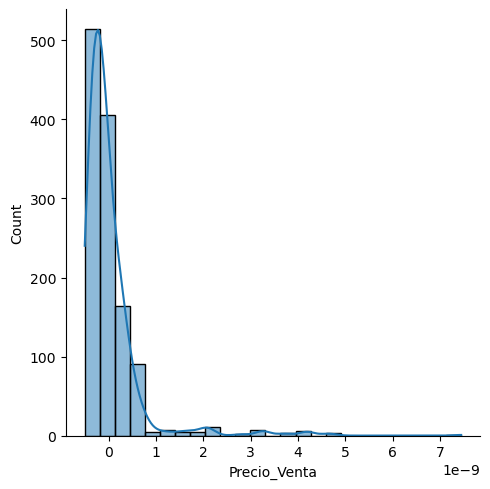

In [27]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()
sns.displot(test_residual, bins=25, kde=True)

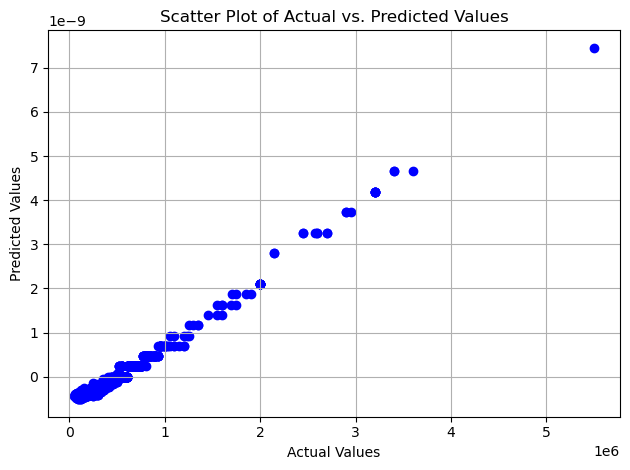

In [28]:
plt.scatter(y_test,test_residual, color='blue') 
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()